In [1]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

from presidential.preprocess import debate_df
from presidential.features import Featurizer

In [5]:
??debate_df

In [8]:
debate_df

,segment,speaker,debate
0,Live from the Bank United Center on the campus...,tapper,r_miami_2016_03_10
1,In just five days voters will go to the polls ...,tapper,r_miami_2016_03_10
2,Florida and Ohio each have a large number of d...,tapper,r_miami_2016_03_10
3,We hope tonight the candidates will give the v...,tapper,r_miami_2016_03_10
4,So now let's welcome the candidates.,tapper,r_miami_2016_03_10
...,...,...,...
12665,Thank you. Thank you Senator Clinton. Thank yo...,ifill,d_milwaukee_2016_02_11
12666,"And we want to thank our audience, our quiet a...",woodruff,d_milwaukee_2016_02_11
12667,I'm going to remain here in Milwaukee tomorrow...,ifill,d_milwaukee_2016_02_11
12668,And I'm going to be returning to Washington. I...,woodruff,d_milwaukee_2016_02_11


In [9]:
debate_df.shape

(12670, 3)

In [10]:
debate_df.columns

Index(['segment', 'speaker', 'debate'], dtype='object')

## Add more features 

In [11]:
# add segment length as a feature 

updated_debate_df = debate_df
updated_debate_df["segment_length"] = updated_debate_df.segment.str.len()
updated_debate_df

,segment,speaker,debate,segment_length
0,Live from the Bank United Center on the campus...,tapper,r_miami_2016_03_10,224
1,In just five days voters will go to the polls ...,tapper,r_miami_2016_03_10,203
2,Florida and Ohio each have a large number of d...,tapper,r_miami_2016_03_10,281
3,We hope tonight the candidates will give the v...,tapper,r_miami_2016_03_10,91
4,So now let's welcome the candidates.,tapper,r_miami_2016_03_10,36
...,...,...,...,...
12665,Thank you. Thank you Senator Clinton. Thank yo...,ifill,d_milwaukee_2016_02_11,174
12666,"And we want to thank our audience, our quiet a...",woodruff,d_milwaukee_2016_02_11,302
12667,I'm going to remain here in Milwaukee tomorrow...,ifill,d_milwaukee_2016_02_11,108
12668,And I'm going to be returning to Washington. I...,woodruff,d_milwaukee_2016_02_11,171


In [12]:
df = updated_debate_df

In [13]:
df.columns

Index(['segment', 'speaker', 'debate', 'segment_length'], dtype='object')

In [14]:
from presidential.features import Featurizer

f = Featurizer()

col_dict = {}
col_dict["mtld"] = df.segment.apply(f.get_mtld)
col_dict["n_difficult_words"] = df.segment.apply(f.get_difficult_words_count)
col_dict["n_opponent_mentions"] = df.segment.apply(f.get_n_opponent_mentions)
# etc. for all other features

for k, v in col_dict.items():
    df[k] = v

df.head()

,segment,speaker,debate,segment_length,mtld,n_difficult_words,n_opponent_mentions
0,Live from the Bank United Center on the campus...,tapper,r_miami_2016_03_10,224,56.000000,9,0
1,In just five days voters will go to the polls ...,tapper,r_miami_2016_03_10,203,57.166667,8,0
2,Florida and Ohio each have a large number of d...,tapper,r_miami_2016_03_10,281,71.501818,7,0
3,We hope tonight the candidates will give the v...,tapper,r_miami_2016_03_10,91,63.000000,3,0
4,So now let's welcome the candidates.,tapper,r_miami_2016_03_10,36,7.000000,1,0


In [23]:
dir(f)[-7:]

['get_difficult_words_count',
 'get_mtld',
 'get_n_opponent_mentions',
 'get_n_words_before_main_verb',
 'get_readability_score',
 'get_sent_length_stats',
 'get_spacy_vector']

# Explore dataframe

In [20]:
from presidential.utils import DATA_DIR

path_to_csv = DATA_DIR / "new_df4.csv"
df = pd.read_csv(path_to_csv)

In [21]:
df_keep = df

In [22]:
df.columns

Index(['segment', 'speaker', 'debate', 'mtld', 'n_difficult_words',
       'n_opponent_mentions', 'n_words_before_main_verb', 'readability',
       'person_1sg', 'person_1pl', 'person_2', 'person_3', 'n_words',
       'n_sents', 'mean_sent_length', 'std_sent_length', 'segment_length'],
      dtype='object')

In [23]:
df.head()

,segment,speaker,debate,mtld,n_difficult_words,n_opponent_mentions,n_words_before_main_verb,readability,person_1sg,person_1pl,person_2,person_3,n_words,n_sents,mean_sent_length,std_sent_length,segment_length
0,Live from the Bank United Center on the campus...,tapper,r_miami_2016_03_10,56.000000,9,0,0,11.0375,3,2,0,0,39,2,19.5,1.500000,224
1,In just five days voters will go to the polls ...,tapper,r_miami_2016_03_10,57.166667,8,0,15,10.3625,4,1,0,2,35,2,17.5,6.500000,203
2,Florida and Ohio each have a large number of d...,tapper,r_miami_2016_03_10,71.501818,7,0,0,8.6525,2,0,0,2,51,3,17.0,9.201449,281
3,We hope tonight the candidates will give the v...,tapper,r_miami_2016_03_10,63.000000,3,0,1,9.3000,0,1,0,1,15,1,15.0,0.000000,91
4,So now let's welcome the candidates.,tapper,r_miami_2016_03_10,7.000000,1,0,2,6.6625,0,1,0,0,6,1,6.0,0.000000,36


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12670 entries, 0 to 12669
Data columns (total 17 columns):
segment                     12525 non-null object
speaker                     12670 non-null object
debate                      12670 non-null object
mtld                        12670 non-null float64
n_difficult_words           12670 non-null int64
n_opponent_mentions         12670 non-null int64
n_words_before_main_verb    12670 non-null int64
readability                 12670 non-null float64
person_1sg                  12670 non-null int64
person_1pl                  12670 non-null int64
person_2                    12670 non-null int64
person_3                    12670 non-null int64
n_words                     12670 non-null int64
n_sents                     12670 non-null int64
mean_sent_length            12525 non-null float64
std_sent_length             12525 non-null float64
segment_length              12670 non-null int64
dtypes: float64(4), int64(10), object(3)
memory

In [25]:
df[pd.isna(df.segment)]

,segment,speaker,debate,mtld,n_difficult_words,n_opponent_mentions,n_words_before_main_verb,readability,person_1sg,person_1pl,person_2,person_3,n_words,n_sents,mean_sent_length,std_sent_length,segment_length
660,NaN,wallace,r_detroit_2016_03_03,0.0,0,0,0,-7.8775,0,0,0,0,0,0,NaN,NaN,0
670,NaN,rubio,r_detroit_2016_03_03,0.0,0,0,0,-7.8775,0,0,0,0,0,0,NaN,NaN,0
683,NaN,rubio,r_detroit_2016_03_03,0.0,0,0,0,-7.8775,0,0,0,0,0,0,NaN,NaN,0
700,NaN,trump,r_detroit_2016_03_03,0.0,0,0,0,-7.8775,0,0,0,0,0,0,NaN,NaN,0
706,NaN,trump,r_detroit_2016_03_03,0.0,0,0,0,-7.8775,0,0,0,0,0,0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12327,NaN,cruz,r_greenville_2016_02_13,0.0,0,0,0,-7.8775,0,0,0,0,0,0,NaN,NaN,0
12343,NaN,cruz,r_greenville_2016_02_13,0.0,0,0,0,-7.8775,0,0,0,0,0,0,NaN,NaN,0
12431,NaN,trump,r_greenville_2016_02_13,0.0,0,0,0,-7.8775,0,0,0,0,0,0,NaN,NaN,0
12433,NaN,dickerson,r_greenville_2016_02_13,0.0,0,0,0,-7.8775,0,0,0,0,0,0,NaN,NaN,0


In [26]:
df.dropna(subset=["segment"])

,segment,speaker,debate,mtld,n_difficult_words,n_opponent_mentions,n_words_before_main_verb,readability,person_1sg,person_1pl,person_2,person_3,n_words,n_sents,mean_sent_length,std_sent_length,segment_length
0,Live from the Bank United Center on the campus...,tapper,r_miami_2016_03_10,56.000000,9,0,0,11.0375,3,2,0,0,39,2,19.50,1.500000,224
1,In just five days voters will go to the polls ...,tapper,r_miami_2016_03_10,57.166667,8,0,15,10.3625,4,1,0,2,35,2,17.50,6.500000,203
2,Florida and Ohio each have a large number of d...,tapper,r_miami_2016_03_10,71.501818,7,0,0,8.6525,2,0,0,2,51,3,17.00,9.201449,281
3,We hope tonight the candidates will give the v...,tapper,r_miami_2016_03_10,63.000000,3,0,1,9.3000,0,1,0,1,15,1,15.00,0.000000,91
4,So now let's welcome the candidates.,tapper,r_miami_2016_03_10,7.000000,1,0,2,6.6625,0,1,0,0,6,1,6.00,0.000000,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12665,Thank you. Thank you Senator Clinton. Thank yo...,ifill,d_milwaukee_2016_02_11,20.869015,7,2,2,7.9125,0,3,3,2,29,4,7.25,6.832825,174
12666,"And we want to thank our audience, our quiet a...",woodruff,d_milwaukee_2016_02_11,59.360000,13,0,4,7.5150,1,3,2,5,53,4,13.25,7.562242,302
12667,I'm going to remain here in Milwaukee tomorrow...,ifill,d_milwaukee_2016_02_11,112.000000,4,0,2,10.3200,2,1,0,4,19,1,19.00,0.000000,108
12668,And I'm going to be returning to Washington. I...,woodruff,d_milwaukee_2016_02_11,72.576000,4,0,5,4.0775,4,1,2,2,33,4,8.25,3.561952,171


Text(0, 0.5, 'Segment count')

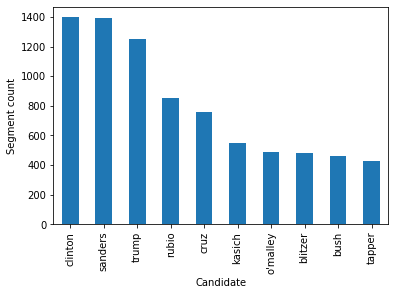

In [27]:
seg_counts = df['speaker'].value_counts()[:10]
seg_counts.plot(kind="bar")

plt.xlabel('Candidate')
plt.ylabel('Segment count')

In [28]:
df['speaker'].value_counts()[:20]

clinton      1397
sanders      1390
trump        1249
rubio         851
cruz          761
kasich        550
o'malley      491
blitzer       482
bush          463
tapper        430
cooper        403
christie      333
carson        284
kelly         282
muir          269
dickerson     259
baier         234
cuomo         213
wallace       204
paul          190
Name: speaker, dtype: int64

In [29]:
df.describe()

,mtld,n_difficult_words,n_opponent_mentions,n_words_before_main_verb,readability,person_1sg,person_1pl,person_2,person_3,n_words,n_sents,mean_sent_length,std_sent_length,segment_length
count,12670.000000,12670.000000,12670.000000,12670.000000,12670.000000,12670.000000,12670.000000,12670.000000,12670.000000,12670.000000,12670.000000,12525.000000,12525.000000,12670.000000
mean,43.009191,4.824941,0.259432,6.293370,7.310935,2.944041,1.022178,0.867956,0.862273,31.899132,2.384057,13.433589,3.912324,175.607498
std,39.001061,4.715220,0.566116,9.203176,5.634208,3.316676,1.675949,1.514528,1.553596,28.769331,1.748971,10.405273,4.900029,158.165145
min,0.000000,0.000000,0.000000,0.000000,-10.952500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,8.000000,1.000000,0.000000,0.000000,4.360000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,6.000000,0.000000,40.000000
50%,39.222035,4.000000,0.000000,3.000000,7.425000,2.000000,0.000000,0.000000,0.000000,28.000000,2.000000,11.500000,2.046338,154.000000
75%,64.736000,7.000000,0.000000,9.000000,10.231875,5.000000,1.000000,1.000000,1.000000,48.000000,3.000000,18.000000,6.500000,265.000000
max,542.080000,76.000000,9.000000,91.000000,52.150000,46.000000,28.000000,16.000000,18.000000,502.000000,25.000000,94.000000,50.000000,2724.000000


In [30]:
df.groupby("speaker").groups.keys()

dict_keys(['arrarás', 'baier', 'bartiromo', 'bash', 'blitzer', 'bush', 'carson', 'cavuto', 'chafee', 'christie', 'clinton', 'cooney', 'cooper', 'cordes', 'cruz', 'cuomo', 'dickerson', 'dinan', 'fiorina', 'garrett', 'hewitt', 'holt', 'huckabee', 'ifill', 'kasich', 'kelly', 'lemon', 'lopez', 'louis', 'maddow', 'mitchell', 'muir', "o'malley", 'obradovich', 'paul', 'raddatz', 'ramos', 'rubio', 'salinas', 'sanders', 'strassel', 'tapper', 'todd', 'trump', 'tumulty', 'unidentifiable', 'unidentified', 'unknown', 'walker', 'wallace', 'webb', 'woodruff'])

In [31]:
df.groupby("speaker").get_group("sanders").describe()

,mtld,n_difficult_words,n_opponent_mentions,n_words_before_main_verb,readability,person_1sg,person_1pl,person_2,person_3,n_words,n_sents,mean_sent_length,std_sent_length,segment_length
count,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1374.000000,1374.000000,1390.000000
mean,49.878636,6.039568,0.168345,7.510791,7.898302,4.022302,1.244604,0.588489,0.892086,39.013669,2.575540,15.960167,5.202784,216.084892
std,39.068758,5.663648,0.484911,11.430050,6.245138,3.939637,1.776341,1.146760,1.571390,35.003042,2.078649,11.615705,6.043557,195.711579
min,0.000000,0.000000,0.000000,0.000000,-10.952500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,0.000000,0.000000,4.841875,1.000000,0.000000,0.000000,0.000000,13.000000,1.000000,8.000000,0.000000,71.250000
50%,48.836899,5.000000,0.000000,3.000000,8.166250,3.000000,1.000000,0.000000,0.000000,35.000000,2.000000,14.000000,3.500000,196.000000
75%,71.680000,9.000000,0.000000,9.000000,11.234375,6.000000,2.000000,1.000000,1.000000,54.750000,3.000000,21.475000,8.500000,300.000000
max,362.880000,54.000000,6.000000,72.000000,32.667500,46.000000,16.000000,9.000000,12.000000,374.000000,22.000000,90.000000,35.000000,2111.000000


In [32]:
df.groupby("speaker").get_group("clinton").describe()

,mtld,n_difficult_words,n_opponent_mentions,n_words_before_main_verb,readability,person_1sg,person_1pl,person_2,person_3,n_words,n_sents,mean_sent_length,std_sent_length,segment_length
count,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000,1397.00000,1397.000000,1397.000000,1380.000000,1380.000000,1397.000000
mean,55.082638,6.565497,0.128132,7.020759,8.057432,4.417323,1.539728,0.637795,1.06156,44.173944,2.666428,17.688840,5.268986,240.760916
std,37.881432,6.038277,0.376670,10.111711,5.728680,4.118386,2.088830,1.339483,1.68184,38.349553,2.031725,11.963395,5.647278,210.685768
min,0.000000,0.000000,0.000000,0.000000,-10.952500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,29.230769,2.000000,0.000000,1.000000,5.532500,1.000000,0.000000,0.000000,0.00000,19.000000,1.000000,10.000000,0.000000,104.000000
50%,54.826575,6.000000,0.000000,4.000000,8.265000,4.000000,1.000000,0.000000,0.00000,42.000000,2.000000,15.500000,4.027682,227.000000
75%,75.158961,9.000000,0.000000,9.000000,11.065000,6.000000,2.000000,1.000000,2.00000,59.000000,3.000000,22.500000,8.286535,322.000000
max,323.680000,76.000000,3.000000,89.000000,30.257500,33.000000,28.000000,13.000000,15.00000,502.000000,25.000000,90.000000,50.000000,2724.000000


In [33]:
df.groupby("speaker").get_group("trump").describe()

,mtld,n_difficult_words,n_opponent_mentions,n_words_before_main_verb,readability,person_1sg,person_1pl,person_2,person_3,n_words,n_sents,mean_sent_length,std_sent_length,segment_length
count,1249.000000,1249.000000,1249.00000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1225.000000,1225.000000,1249.000000
mean,31.751392,2.887910,0.06245,7.561249,4.416109,3.164131,1.032026,0.722178,1.004003,29.706165,2.939151,10.134850,3.611950,155.970376
std,29.555430,2.918814,0.40344,9.975915,4.885186,3.467495,1.811360,1.333312,1.677285,25.116478,2.144869,7.437729,4.133784,132.322547
min,0.000000,0.000000,0.00000,0.000000,-10.952500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,8.000000,0.000000,0.00000,0.000000,2.057500,1.000000,0.000000,0.000000,0.000000,7.000000,1.000000,5.000000,0.000000,38.000000
50%,26.401071,2.000000,0.00000,4.000000,4.557500,2.000000,0.000000,0.000000,0.000000,25.000000,2.000000,8.833333,2.500000,127.000000
75%,46.240000,5.000000,0.00000,11.000000,6.792500,5.000000,1.000000,1.000000,2.000000,46.000000,4.000000,13.000000,5.535341,242.000000
max,252.000000,16.000000,9.00000,91.000000,40.425000,33.000000,17.000000,16.000000,12.000000,184.000000,12.000000,65.000000,30.500000,866.000000


In [ ]:
# import pandas as pd

# feature_importances = pd.DataFrame(
#     rf.feature_importances_,
#     index = X_train.columns,
#     columns=['importance']).sort_values('importance',ascending=False)
# feature_importances

In [34]:
features = df.columns
candidates_of_interest = ["trump", "sanders", "clinton", "cruz"]

features

Index(['segment', 'speaker', 'debate', 'mtld', 'n_difficult_words',
       'n_opponent_mentions', 'n_words_before_main_verb', 'readability',
       'person_1sg', 'person_1pl', 'person_2', 'person_3', 'n_words',
       'n_sents', 'mean_sent_length', 'std_sent_length', 'segment_length'],
      dtype='object')

['person_1sg', 'person_1pl', 'person_2', 'person_3']


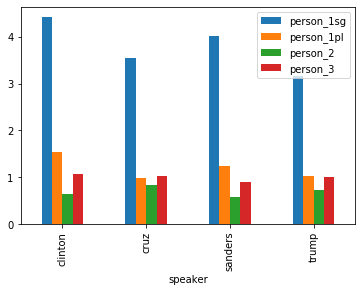

In [45]:
features = df.columns
candidates_of_interest = ["trump", "sanders", "clinton", "cruz"]

pronouns = [f for f in features if f.startswith("person_")]
print(pronouns)

df_by_speaker = df.groupby('speaker').agg('mean')
pronouns_subset = df_by_speaker.loc[candidates_of_interest][pronouns].sort_values("speaker")
pronouns_subset
pronouns_subset.plot.bar()
plt.savefig("images/pronouns_graphs.png")

In [ ]:
figure

In [91]:
n_opponent_mentions = "n_opponent_mentions"
df_by_speaker.loc[candidates_of_interest][[n_opponent_mentions]].sort_values(n_opponent_mentions)

,n_opponent_mentions
speaker,
trump,0.062450
clinton,0.128132
sanders,0.168345
cruz,0.185283


In [218]:
linguistic = ["mtld", "readability", "n_difficult_words", "n_words_before_main_verb"]
linguistic_df = df_by_speaker.loc[candidates_of_interest][linguistic].sort_values("speaker")
linguistic_df

,mtld,readability,n_difficult_words,n_words_before_main_verb
speaker,,,,
clinton,55.082638,8.057432,6.565497,7.020759
cruz,50.291845,8.379041,6.534823,7.563732
sanders,49.878636,7.898302,6.039568,7.510791
trump,31.751392,4.416109,2.887910,7.561249


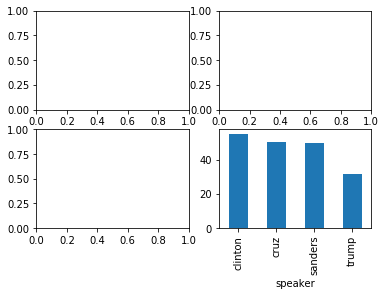

In [181]:
shape = (2,2)

ax1 = plt.subplot2grid(shape=shape, loc=(0,0))
ax2 = plt.subplot2grid(shape=shape, loc=(0,1))
ax3 = plt.subplot2grid(shape=shape, loc=(1,0))
ax4 = plt.subplot2grid(shape=shape, loc=(1,1))

ax1 = linguistic_df["mtld"].plot.bar()
ax2 = linguistic_df["readability"].plot.bar()
ax3 = linguistic_df["n_difficult_words"].plot.bar()
ax4 = linguistic_df["n_words_before_main_verb"].plot.bar()

In [166]:
linguistic_df['mtld'].keys()

Index(['clinton', 'cruz', 'sanders', 'trump'], dtype='object', name='speaker')

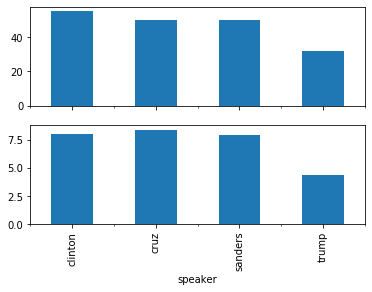

In [187]:
# fig1, f1_axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True)
fig, axes = plt.subplots(2, sharex=True)
linguistic_df['mtld'].plot(kind='bar', ax = axes[0])
linguistic_df['readability'].plot(kind='bar', ax = axes[1])

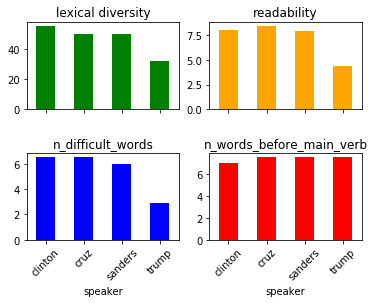

In [262]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)

linguistic_df['mtld'].plot(kind='bar', ax=ax1, color="green")
linguistic_df['readability'].plot(kind='bar', ax=ax2, color="orange")
linguistic_df['n_difficult_words'].plot(kind='bar', ax=ax3, color="blue")
linguistic_df['n_words_before_main_verb'].plot(kind='bar', ax=ax4, color="red")

ax1.title.set_text("lexical diversity")
ax2.title.set_text("readability")
ax3.title.set_text("n_difficult_words")
ax4.title.set_text("n_words_before_main_verb")

for ax in fig.axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

fig.subplots_adjust(hspace=.5, wspace=.2)
fig.savefig("syntactic_lexical.pdf")

In [253]:
df.head()

,segment,speaker,debate,mtld,n_difficult_words,n_opponent_mentions,n_words_before_main_verb,readability,person_1sg,person_1pl,person_2,person_3,n_words,n_sents,mean_sent_length,std_sent_length,segment_length
0,Live from the Bank United Center on the campus...,tapper,r_miami_2016_03_10,56.000000,9,0,0,11.0375,3,2,0,0,39,2,19.5,1.500000,224
1,In just five days voters will go to the polls ...,tapper,r_miami_2016_03_10,57.166667,8,0,15,10.3625,4,1,0,2,35,2,17.5,6.500000,203
2,Florida and Ohio each have a large number of d...,tapper,r_miami_2016_03_10,71.501818,7,0,0,8.6525,2,0,0,2,51,3,17.0,9.201449,281
3,We hope tonight the candidates will give the v...,tapper,r_miami_2016_03_10,63.000000,3,0,1,9.3000,0,1,0,1,15,1,15.0,0.000000,91
4,So now let's welcome the candidates.,tapper,r_miami_2016_03_10,7.000000,1,0,2,6.6625,0,1,0,0,6,1,6.0,0.000000,36


In [137]:
features = df.columns
candidates_of_interest = ["trump", "sanders", "clinton", "cruz"]

sent_length = ['n_words', 'n_sents', 'mean_sent_length', 'std_sent_length', 'segment_length']
sent_length_df = df_by_speaker.loc[candidates_of_interest][sent_length].sort_values("speaker")
sent_length_df

,n_words,n_sents,mean_sent_length,std_sent_length,segment_length
speaker,,,,,
clinton,44.173944,2.666428,17.688840,5.268986,240.760916
cruz,37.320631,2.508541,16.279339,4.486755,210.779238
sanders,39.013669,2.575540,15.960167,5.202784,216.084892
trump,29.706165,2.939151,10.134850,3.611950,155.970376


In [261]:
df.groupby("speaker").agg("mean").loc[candidates_of_interest]

,mtld,n_difficult_words,n_opponent_mentions,n_words_before_main_verb,readability,person_1sg,person_1pl,person_2,person_3,n_words,n_sents,mean_sent_length,std_sent_length,segment_length
speaker,,,,,,,,,,,,,,
trump,31.751392,2.887910,0.062450,7.561249,4.416109,3.164131,1.032026,0.722178,1.004003,29.706165,2.939151,10.134850,3.611950,155.970376
sanders,49.878636,6.039568,0.168345,7.510791,7.898302,4.022302,1.244604,0.588489,0.892086,39.013669,2.575540,15.960167,5.202784,216.084892
clinton,55.082638,6.565497,0.128132,7.020759,8.057432,4.417323,1.539728,0.637795,1.061560,44.173944,2.666428,17.688840,5.268986,240.760916
cruz,50.291845,6.534823,0.185283,7.563732,8.379041,3.542707,0.993430,0.833114,1.036794,37.320631,2.508541,16.279339,4.486755,210.779238


In [138]:
sent_length_df_norm = (sent_length_df - sent_length_df.mean()) / (sent_length_df.max() - sent_length_df.min())
sent_length_df_norm

,n_words,n_sents,mean_sent_length,std_sent_length,segment_length
speaker,,,,,
clinton,0.457592,-0.013904,0.353858,0.378005,0.411155
cruz,-0.016103,-0.380562,0.167268,-0.094062,0.057558
sanders,0.100919,-0.224973,0.125016,0.338052,0.120132
trump,-0.542408,0.619438,-0.646142,-0.621995,-0.588845


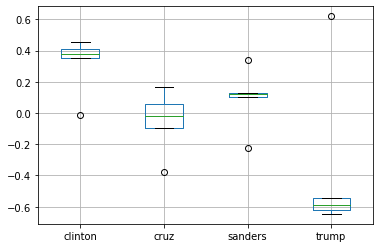

In [251]:
sent_length_df_norm.T.boxplot()